<a href="https://colab.research.google.com/github/andrillion/Projects/blob/master/fpl_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal fantasy football squad
## Content

1. Webscraping
2. Data cleaning
3. Data exploration
4. Optimiziation
5. Plot optimal team
6. Points vs cost regression

## 1.Webscraping

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the Fantasy Premier League site
url = 'https://fplform.com/fpl-player-data'

try:
    # Send a request to the website
    response = requests.get(url)
    print("Request sent, status code:", response.status_code)
except Exception as e:
    print("An error occurred while making the request:", e)
    exit()

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve data: Status code {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Print a part of soup to check if the request was successful
print("Part of the HTML content:")
print(soup.prettify()[:500])  # Prints first 500 characters of the HTML

# Find the table with the ID 'players'
players_table = soup.find('table', id='playerdata')

# Check if the table is found
if not players_table:
    print("Players table not found")
    exit()
else:
    print("Players table found")


Request sent, status code: 200
Part of the HTML content:
<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   FPL Player Data | FPL Form
  </title>
  <meta content="Interactive table of Fantasy Premier League (FPL) player data &amp; information." name="description"/>
  <meta content="FPL Form Fantasy Premier League player data information football soccer" name="keywords"/>
  <!-- user-scalable=no is to make fixedHeader work correctly on Android (found by using http://debug.datatables.net/) -->
  <meta content="width=device-width, height=device-height
Players table found


# 2. Data cleaning

In [8]:
import os
print(os.getcwd())



/content


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Fantasy Premier League site
url = 'https://fplform.com/fpl-player-data'

# Send a request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve data: Status code {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the ID 'players'
players_table = soup.find('table', id='playerdata')

# Check if the table is found
if not players_table:
    print("Players table not found")
    exit()

# Convert the table to a DataFrame
df = pd.read_html(str(players_table))[0]

# Now you can manipulate the DataFrame as needed, for example:
# Rename columns, handle missing values, convert data types, etc.
# df.columns = ['Name', 'Position', 'Team', 'Cost', 'Points'] # Example to rename columns

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/My Drive/fpl_players.csv', index=False)

print("Data scraping and saving completed successfully.")


<ipython-input-11-d0f44e37e848>:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(players_table))[0]


Data scraping and saving completed successfully.


In [12]:
import pandas as pd

# Full file path
file_path = '/content/drive/My Drive/fpl_players.csv'
#file_path = '/content/drive/My Drive/fpl_.csv'


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head(50)


,Name,Position,Team,Current Price,Total Points,Points Per Game,Event Points,Form,Value Form,EP Next,...,Red Cards,Saves,Bonus,Influence,Creativity,Threat,In Dreamteam,News Added,ID,Fetched From FPL (London time)
0,Haaland,Forward,Man City,15.3,63,12.6,9,13.0,0.8,13.5,...,0,0,14,354.8,17.0,386.0,1.0,"Fri Sep 13, 15:00",351,"Wed Sep 25, 01:15:02"
1,Luis Díaz,Midfielder,Liverpool,7.9,51,10.2,16,11.3,1.4,11.8,...,0,0,8,227.8,106.7,199.0,1.0,NaN,327,"Wed Sep 25, 01:15:02"
2,M.Salah,Midfielder,Liverpool,12.8,49,9.8,6,8.3,0.6,8.8,...,0,0,8,225.8,161.0,307.0,1.0,NaN,328,"Wed Sep 25, 01:15:02"
3,Gabriel,Defender,Arsenal,6.1,36,7.2,7,8.0,1.3,9.5,...,0,0,4,170.6,25.6,92.0,1.0,NaN,3,"Wed Sep 25, 01:15:01"
4,Palmer,Midfielder,Chelsea,10.6,36,7.2,8,5.7,0.5,5.7,...,0,0,4,181.4,173.5,66.0,1.0,"Wed Sep 4, 10:00",182,"Wed Sep 25, 01:15:02"
5,N.Jackson,Forward,Chelsea,7.7,35,7.0,16,7.7,1.0,7.7,...,0,0,5,183.0,76.8,212.0,1.0,NaN,180,"Wed Sep 25, 01:15:02"
6,Saka,Midfielder,Arsenal,10.0,35,7.0,4,5.7,0.6,7.2,...,0,0,4,172.4,174.1,206.0,1.0,"Sun Sep 15, 23:00",17,"Wed Sep 25, 01:15:01"
7,Mbeumo,Midfielder,Brentford,7.2,34,6.8,8,8.0,1.1,8.0,...,0,0,6,181.6,160.4,144.0,1.0,NaN,99,"Wed Sep 25, 01:15:01"
8,Barnes,Midfielder,Newcastle,6.5,33,6.6,10,9.0,1.4,8.5,...,0,0,8,140.8,81.8,102.0,NaN,NaN,392,"Wed Sep 25, 01:15:02"
9,Raya,Goalkeeper,Arsenal,5.6,33,6.6,4,5.0,0.9,6.5,...,0,23,6,193.8,0.0,0.0,1.0,NaN,15,"Wed Sep 25, 01:15:01"


In [13]:
# Display the column names of the DataFrame
print(df.columns)


Index(['Name', 'Position', 'Team', 'Current Price', 'Total Points',
       'Points Per Game', 'Event Points', 'Form', 'Value Form', 'EP Next',
       'ICT Index', 'BPS', 'Penalties Order', 'Direct Freekick Order',
       'Corners/ Indirect Order', 'Chance Of Playing', 'Availability', 'News',
       'Selected By Percent', 'Transfers In', 'Transfers In Event',
       'Transfers Out', 'Transfers Out Event', 'Minutes', 'Goals Scored',
       'Assists', 'Clean Sheets', 'Goals Conceded', 'Goals Conceded per 90',
       'Own Goals', 'Penalties Saved', 'Penalties Missed', 'Yellow Cards',
       'Red Cards', 'Saves', 'Bonus', 'Influence', 'Creativity', 'Threat',
       'In Dreamteam', 'News Added', 'ID', 'Fetched From FPL (London time)'],
      dtype='object')


In [14]:
# Specify the columns you want to keep
columns_to_keep = ["Name", "Position", "Team", "Current Price", "Total Points", "Bonus", "Points Per Game"]  # Replace with your actual column names

# Select these columns
df = df[columns_to_keep]

# Now df will only contain the columns specified in columns_to_keep
print(df.head())

        Name    Position       Team  Current Price  Total Points  Bonus  \
0    Haaland     Forward   Man City           15.3            63     14   
1  Luis Díaz  Midfielder  Liverpool            7.9            51      8   
2    M.Salah  Midfielder  Liverpool           12.8            49      8   
3    Gabriel    Defender    Arsenal            6.1            36      4   
4     Palmer  Midfielder    Chelsea           10.6            36      4   

   Points Per Game  
0             12.6  
1             10.2  
2              9.8  
3              7.2  
4              7.2  


In [15]:
# List of player names to remove
players_to_remove = ['Olise', 'Alvarez', 'Barco']  # Replace with actual names

# Filter out rows where 'PLAYER' is in the list of players to remove
df = df[~df['Name'].isin(players_to_remove)]

In [16]:
# Rename columns
df = df.rename(columns={
    'Name' : 'PLAYER',
    'Team' : 'TEAM',
    'Position': 'POSITION',
    'Current Price': 'PRICE',
    'Total Points': 'POINTS',
    'Points Per Game': 'POINTS_GAME'
})

# Specify the columns you want to keep
columns_to_keep = ['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_GAME']

# Select these columns
df = df[columns_to_keep]

# Display the first few rows of the modified DataFrame
df.head()


,PLAYER,TEAM,POSITION,PRICE,POINTS,POINTS_GAME
0,Haaland,Man City,Forward,15.3,63,12.6
1,Luis Díaz,Liverpool,Midfielder,7.9,51,10.2
2,M.Salah,Liverpool,Midfielder,12.8,49,9.8
3,Gabriel,Arsenal,Defender,6.1,36,7.2
4,Palmer,Chelsea,Midfielder,10.6,36,7.2


In [17]:
type('POINTS')

str

In [18]:
df['POINTS'] = pd.to_numeric(df['POINTS'], errors='coerce')
df.head(20)

,PLAYER,TEAM,POSITION,PRICE,POINTS,POINTS_GAME
0,Haaland,Man City,Forward,15.3,63,12.6
1,Luis Díaz,Liverpool,Midfielder,7.9,51,10.2
2,M.Salah,Liverpool,Midfielder,12.8,49,9.8
3,Gabriel,Arsenal,Defender,6.1,36,7.2
4,Palmer,Chelsea,Midfielder,10.6,36,7.2
5,N.Jackson,Chelsea,Forward,7.7,35,7.0
6,Saka,Arsenal,Midfielder,10.0,35,7.0
7,Mbeumo,Brentford,Midfielder,7.2,34,6.8
8,Barnes,Newcastle,Midfielder,6.5,33,6.6
9,Raya,Arsenal,Goalkeeper,5.6,33,6.6


In [19]:
df = df[df['POINTS'] > 0]
df = df.reset_index(drop=True)


In [20]:
# Convert 'Points' and 'Cost' columns to numeric type (float)
df['POINTS'] = pd.to_numeric(df['POINTS'], errors='coerce')
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

# Now calculate 'Points per Cost'
df['POINTS_MILLION'] = df['POINTS'] / df['PRICE']

# Display the first few rows of the DataFrame to see the new column
df.head()


,PLAYER,TEAM,POSITION,PRICE,POINTS,POINTS_GAME,POINTS_MILLION
0,Haaland,Man City,Forward,15.3,63,12.6,4.117647
1,Luis Díaz,Liverpool,Midfielder,7.9,51,10.2,6.455696
2,M.Salah,Liverpool,Midfielder,12.8,49,9.8,3.828125
3,Gabriel,Arsenal,Defender,6.1,36,7.2,5.901639
4,Palmer,Chelsea,Midfielder,10.6,36,7.2,3.396226


In [21]:
#df['POINTS_MATCH'] = (df['POINTS'] / 18).round(2)

In [22]:
print(df.columns)


Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_GAME',
       'POINTS_MILLION'],
      dtype='object')


In [23]:
# Filter out players with less than 20 points in place
#df = df[df['POINTS'] >= 10]

# Display the first few rows of the modified DataFrame
#df.head()


# 3. Data exploration

In [24]:
# Group the data by position and calculate the average points per position
average_points_by_position = df.groupby('POSITION')['POINTS'].mean().reset_index()

# Rename the columns for clarity
average_points_by_position.columns = ['POSITION', 'Average_Points']

# Sort the positions by average points in descending order
sorted_positions = average_points_by_position.sort_values(by='Average_Points', ascending=False)

# Display the result
print(sorted_positions)


     POSITION  Average_Points
2  Goalkeeper       12.892857
1     Forward       12.466667
3  Midfielder        9.222749
0    Defender        8.945736


In [25]:
# Group the data by position and calculate the average points per position
average_points_million_by_position = df.groupby('POSITION')['POINTS_MILLION'].mean().reset_index()

# Rename the columns for clarity
average_points_million_by_position.columns = ['POSITION', 'Average_Points_MILLION']

# Sort the positions by average points in descending order
sorted_positions = average_points_million_by_position.sort_values(by='Average_Points_MILLION', ascending=False)

# Display the result
print(sorted_positions)

     POSITION  Average_Points_MILLION
2  Goalkeeper                2.685194
0    Defender                1.862587
1     Forward                1.845375
3  Midfielder                1.577367


In [26]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# data = {'NAME': [...], 'TEAM': [...], 'POSITION': [...], 'PRICE': [...], 'POINTS_MILLION': [...]}
# df = pd.DataFrame(data)

# Group the data by position
position_groups = df.groupby('POSITION')

# Define a function to sort each group by POINTS_MILLION in descending order and return the top 10 players
def top_10_by_points_million(group):
    # Sort by POINTS_MILLION in descending order and return the top 10 players
    sorted_group = group.sort_values(by='POINTS', ascending=False).head(20)
    return sorted_group[['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS']]  # Exclude columns you don't want to print

# Apply the function to each group and concatenate the results
top_10_players_by_position = position_groups.apply(top_10_by_points_million)

# Reset the index of top_10_players_by_position
top_10_players_by_position = top_10_players_by_position.reset_index(drop=True)

# Define the order of positions
#position_order = ['GKP', 'DEF', 'MID', 'FWD']
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']


# Print a blank line between each position group in the specified order
for position in position_order:
    group = top_10_players_by_position[top_10_players_by_position['POSITION'] == position]
    print(f"\n{position}:\n")
    print(group.to_string(index=False))



Goalkeeper:

    PLAYER           TEAM   POSITION  PRICE  POINTS
      Raya        Arsenal Goalkeeper    5.6      33
     Onana        Man Utd Goalkeeper    5.0      30
   Sánchez        Chelsea Goalkeeper    4.6      30
  A.Becker      Liverpool Goalkeeper    5.5      23
      Pope      Newcastle Goalkeeper    5.0      22
      Sels   Nottm Forest Goalkeeper    4.5      21
Ederson M.       Man City Goalkeeper    5.5      19
 Henderson Crystal Palace Goalkeeper    4.5      17
     Muric        Ipswich Goalkeeper    4.4      16
   Flekken      Brentford Goalkeeper    4.5      15
   Vicario          Spurs Goalkeeper    5.0      14
      Leno         Fulham Goalkeeper    5.0      13
    Areola       West Ham Goalkeeper    4.5      12
 Hermansen      Leicester Goalkeeper    4.5      11
Verbruggen       Brighton Goalkeeper    4.5      10
  Kelleher      Liverpool Goalkeeper    4.4       9
  Martinez    Aston Villa Goalkeeper    5.0       9
    Steele       Brighton Goalkeeper    4.5       

In [27]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# data = {'NAME': [...], 'TEAM': [...], 'POSITION': [...], 'PRICE': [...], 'POINTS_MILLION': [...]}
# df = pd.DataFrame(data)

# Group the data by position
position_groups = df.groupby('POSITION')

# Define a function to sort each group by POINTS_MILLION in descending order and return the top 10 players
def top_10_by_points_million(group):
    # Sort by POINTS_MILLION in descending order and return the top 10 players
    sorted_group = group.sort_values(by='POINTS_MILLION', ascending=False)
    return sorted_group[['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS_MILLION']].head(15)  # Exclude columns you don't want to print

# Apply the function to each group and concatenate the results
top_10_players_by_position = position_groups.apply(top_10_by_points_million)

# Reset the index of top_10_players_by_position
top_10_players_by_position = top_10_players_by_position.reset_index(drop=True)

# Define the order of positions
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

# Print a blank line between each position group in the specified order
for position in position_order:
    group = top_10_players_by_position[top_10_players_by_position['POSITION'] == position]
    print(f"\n{position}:\n")
    print(group.to_string(index=False))




Goalkeeper:

    PLAYER           TEAM   POSITION  PRICE  POINTS_MILLION
   Sánchez        Chelsea Goalkeeper    4.6        6.521739
     Onana        Man Utd Goalkeeper    5.0        6.000000
      Raya        Arsenal Goalkeeper    5.6        5.892857
      Sels   Nottm Forest Goalkeeper    4.5        4.666667
      Pope      Newcastle Goalkeeper    5.0        4.400000
  A.Becker      Liverpool Goalkeeper    5.5        4.181818
 Henderson Crystal Palace Goalkeeper    4.5        3.777778
     Muric        Ipswich Goalkeeper    4.4        3.636364
Ederson M.       Man City Goalkeeper    5.5        3.454545
   Flekken      Brentford Goalkeeper    4.5        3.333333
   Vicario          Spurs Goalkeeper    5.0        2.800000
    Areola       West Ham Goalkeeper    4.5        2.666667
      Leno         Fulham Goalkeeper    5.0        2.600000
 Hermansen      Leicester Goalkeeper    4.5        2.444444
Verbruggen       Brighton Goalkeeper    4.5        2.222222

Defender:

          PLAY

In [28]:
print(df.columns)

Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_GAME',
       'POINTS_MILLION'],
      dtype='object')


# 4. Optimization

In [29]:
!pip install pyomo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.7 MB/s eta 0:00:00


In [32]:
!apt-get install -y glpk-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 625 kB of archives.
After this operation, 2,158 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libamd2 amd64 1:5.10.1+dfsg-4build1 [21.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libcolamd2 amd64 1:5.10.1+dfsg-4build1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libglpk40 amd64 5.0-1 [361 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 glpk-ut

In [34]:
!apt-get install -y coinor-cbc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
The following NEW packages will be installed:
  coinor-cbc coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,908 kB of archives.
After this operation, 8,310 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcoinutils3v5 amd64 2.11.4+repack1-2 [465 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libosi1v5 amd64 0.108.6+repack1-2 [275 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libclp1 amd64 1.17.5+repack1-1 [937 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcgl1 amd64 0.60.3+repack1-3 [420 kB]
Get:5 http:/

In [35]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Assume 'df' is your DataFrame with the necessary player data

# Define the set of players
players = range(len(df))

# Define binary decision variables for each player and captain selection
model.Selected = Var(players, within=Binary)
model.Captain = Var(players, within=Binary)

# Define the objective function to maximize total points, including captain's double points
def objective_rule(model):
    return sum(model.Selected[i] * df.iloc[i]['POINTS'] for i in players) + \
           sum(model.Captain[i] * df.iloc[i]['POINTS'] for i in players)
model.obj = Objective(rule=objective_rule, sense=maximize)

# Define the budget constraint for total budget
total_budget = 105  # Example total budget
model.total_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) <= total_budget)

# Define the position constraints
position_constraints = {'Goalkeeper': 2, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}
for position, num_players in position_constraints.items():
    model.add_component(
        f"{position}_constraint",
        Constraint(expr=sum(model.Selected[i] for i in players if df.iloc[i]['POSITION'] == position) == num_players)
    )

# Define a constraint to limit the total number of players selected from each team
team_limit = 3
for team in df['TEAM'].unique():
    model.add_component(
        f'team_{team}_limit_constraint',
        Constraint(expr=sum(model.Selected[i] for i in players if df.iloc[i]['TEAM'] == team) <= team_limit)
    )


# Bench budget constraint
bench_budget_constraint = 17  # Example minimum budget for bench players
model.bench_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) >= bench_budget_constraint)

# Constraint to ensure only one captain is chosen
model.one_captain_constraint = Constraint(expr=sum(model.Captain[i] for i in players) == 1)

# Constraints to ensure that a captain must be among the selected players
for i in players:
    model.add_component(f'captain_selected_constraint_{i}', Constraint(expr=model.Captain[i] <= model.Selected[i]))

# Solve the optimization problem
solver = SolverFactory('cbc')
results = solver.solve(model)

# Extract and print the selected players and captain
selected_players = [i for i in players if model.Selected[i]() == 1]
captain = [i for i in players if model.Captain[i]() == 1][0]  # Assuming there will always be one captain

print("Selected Players:")
for i in selected_players:
    print(df.iloc[i]['PLAYER'], df.iloc[i]['TEAM'], df.iloc[i]['POSITION'], df.iloc[i]['POINTS'])

captain_name = df.iloc[captain]['PLAYER']
captain_points = df.iloc[captain]['POINTS']
print(f"\nCaptain: {captain_name}, Points Gained by Captaincy: {captain_points}")

# Calculate and print the total points and cost
total_points = sum(df.iloc[i]['POINTS'] for i in selected_players) + captain_points  # Double points for captain
total_cost = sum(df.iloc[i]['PRICE'] for i in selected_players)
print(f"\nTotal Points: {total_points}")
print(f"Total Cost: £{total_cost} M")


Selected Players:
Haaland Man City Forward 63
Luis Díaz Liverpool Midfielder 51
M.Salah Liverpool Midfielder 49
Gabriel Arsenal Defender 36
N.Jackson Chelsea Forward 35
Mbeumo Brentford Midfielder 34
Barnes Newcastle Midfielder 33
Raya Arsenal Goalkeeper 33
Welbeck Brighton Forward 31
Smith Rowe Fulham Midfielder 30
Sánchez Chelsea Goalkeeper 30
Dalot Man Utd Defender 29
Mazraoui Man Utd Defender 25
Konaté Liverpool Defender 24
De Ligt Man Utd Defender 23

Captain: Haaland, Points Gained by Captaincy: 63

Total Points: 589
Total Cost: £104.99999999999999 M


In [ ]:
pip install pyomo[extras]


In [ ]:
pip install pyomo[solvers]


In [ ]:
!apt-get install -y glpk-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 625 kB of archives.
After this operation, 2,158 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libamd2 amd64 1:5.10.1+dfsg-4build1 [21.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libcolamd2 amd64 1:5.10.1+dfsg-4build1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libglpk40 amd64 5.0-1 [361 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 glpk-ut

In [ ]:
!apt-get install -y glpk-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
glpk-utils is already the newest version (5.0-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!glpsol --version


GLPSOL--GLPK LP/MIP Solver 5.0
Copyright (C) 2000-2020 Free Software Foundation, Inc.

This program has ABSOLUTELY NO WARRANTY.

This program is free software; you may re-distribute it under the terms
of the GNU General Public License version 3 or later.


In [ ]:
!pip install pyomo
from pyomo.environ import SolverFactory


In [ ]:
!apt-get install -y coinor-cbc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
The following NEW packages will be installed:
  coinor-cbc coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,908 kB of archives.
After this operation, 8,310 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcoinutils3v5 amd64 2.11.4+repack1-2 [465 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libosi1v5 amd64 0.108.6+repack1-2 [275 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libclp1 amd64 1.17.5+repack1-1 [937 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcgl1 amd64 0.60.3+repack1-3 [420 kB]
Get:5 http:/

In [37]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Assume 'df' is your DataFrame with the necessary player data

# Define the set of players
players = range(len(df))

# Define binary decision variables for each player and captain selection
model.Selected = Var(players, within=Binary)
model.Captain = Var(players, within=Binary)

# Define the objective function to maximize total points, including captain's double points
def objective_rule(model):
    return sum(model.Selected[i] * df.iloc[i]['POINTS'] for i in players) + \
           sum(model.Captain[i] * df.iloc[i]['POINTS'] for i in players)
model.obj = Objective(rule=objective_rule, sense=maximize)

# Define the budget constraint for total budget
total_budget = 100  # Example total budget
model.total_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) <= total_budget)

# Define the position constraints
position_constraints = {'Goalkeeper': 2, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}
for position, num_players in position_constraints.items():
    relevant_players = [i for i in players if df.iloc[i]['POSITION'] == position]
    if relevant_players:
        model.add_component(
            f"{position}_constraint",
            Constraint(expr=sum(model.Selected[i] for i in relevant_players) == num_players)
        )
    else:
        raise ValueError(f"No players available for position '{position}'.")

# Define a constraint to limit the total number of players selected from each team
team_limit = 3
for team in df['TEAM'].unique():
    relevant_players = [i for i in players if df.iloc[i]['TEAM'] == team]
    if relevant_players:
        model.add_component(
            f'team_{team}_limit_constraint',
            Constraint(expr=sum(model.Selected[i] for i in relevant_players) <= team_limit)
        )
    else:
        raise ValueError(f"No players available for team '{team}'.")

# Bench budget constraint
bench_budget_constraint = 17  # Example minimum budget for bench players
model.bench_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) >= bench_budget_constraint)

# Constraint to ensure only one captain is chosen
model.one_captain_constraint = Constraint(expr=sum(model.Captain[i] for i in players) == 1)

# Constraints to ensure that a captain must be among the selected players
for i in players:
    model.add_component(f'captain_selected_constraint_{i}', Constraint(expr=model.Captain[i] <= model.Selected[i]))

# Solve the optimization problem
solver = SolverFactory('cbc')
results = solver.solve(model)

# Extract and print the selected players and captain
selected_players = [i for i in players if model.Selected[i]() == 1]
captain = [i for i in players if model.Captain[i]() == 1][0]  # Assuming there will always be one captain

print("Selected Players:")
for i in selected_players:
    print(df.iloc[i]['PLAYER'], df.iloc[i]['TEAM'], df.iloc[i]['POSITION'], df.iloc[i]['POINTS'])

captain_name = df.iloc[captain]['PLAYER']
captain_points = df.iloc[captain]['POINTS']
print(f"\nCaptain: {captain_name}, Points Gained by Captaincy: {captain_points}")

# Calculate and print the total points and cost
total_points = sum(df.iloc[i]['POINTS'] for i in selected_players) + captain_points  # Double points for captain
total_cost = sum(df.iloc[i]['PRICE'] for i in selected_players)
print(f"\nTotal Points: {total_points}")
print(f"Total Cost: £{total_cost} M")


Selected Players:
Haaland Man City Forward 63
Luis Díaz Liverpool Midfielder 51
Gabriel Arsenal Defender 36
N.Jackson Chelsea Forward 35
Mbeumo Brentford Midfielder 34
Barnes Newcastle Midfielder 33
Raya Arsenal Goalkeeper 33
Alexander-Arnold Liverpool Defender 32
Welbeck Brighton Forward 31
Smith Rowe Fulham Midfielder 30
Sánchez Chelsea Goalkeeper 30
Dalot Man Utd Defender 29
Mazraoui Man Utd Defender 25
Konaté Liverpool Defender 24
McNeil Everton Midfielder 24

Captain: Haaland, Points Gained by Captaincy: 63

Total Points: 573
Total Cost: £99.7 M


In [38]:
print(df[df['POSITION'] == 'Goalkeeper'])


           PLAYER            TEAM    POSITION  PRICE  POINTS  POINTS_GAME  \
9            Raya         Arsenal  Goalkeeper    5.6      33          6.6   
13          Onana         Man Utd  Goalkeeper    5.0      30          6.0   
15        Sánchez         Chelsea  Goalkeeper    4.6      30          6.0   
31       A.Becker       Liverpool  Goalkeeper    5.5      23          5.8   
37           Pope       Newcastle  Goalkeeper    5.0      22          4.4   
40           Sels    Nottm Forest  Goalkeeper    4.5      21          4.2   
52     Ederson M.        Man City  Goalkeeper    5.5      19          3.8   
74      Henderson  Crystal Palace  Goalkeeper    4.5      17          3.4   
83          Muric         Ipswich  Goalkeeper    4.4      16          4.0   
89        Flekken       Brentford  Goalkeeper    4.5      15          3.0   
108       Vicario           Spurs  Goalkeeper    5.0      14          2.8   
114          Leno          Fulham  Goalkeeper    5.0      13          2.6   

In [36]:
import pandas as pd

# Extract the selected players
selected_players = [i for i in players if model.Selected[i] == 1]

# Create a DataFrame with the selected players
selected_df = df.iloc[selected_players][['PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION']]

# Define the position order for sorting
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

# Sort the DataFrame by position and then by player name
selected_df['POSITION'] = pd.Categorical(selected_df['POSITION'], categories=position_order, ordered=True)
selected_df = selected_df.sort_values(['POSITION', 'PLAYER'])

# Display the selected players table
print(selected_df)

PyomoException: Cannot convert non-constant Pyomo expression (Selected[0]  ==  1) to bool.
This error is usually caused by using a Var, unit, or mutable Param in a
Boolean context such as an "if" statement, or when checking container
membership or equality. For example,
    >>> m.x = Var()
    >>> if m.x >= 1:
    ...     pass
and
    >>> m.y = Var()
    >>> if m.y in [m.x, m.y]:
    ...     pass
would both cause this exception.

In [39]:
import pandas as pd

# Extract the selected players by evaluating the value of the Pyomo variable
selected_players = [i for i in players if model.Selected[i]() == 1]

# Create a DataFrame with the selected players
selected_df = df.iloc[selected_players][['PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION']]

# Define the position order for sorting
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

# Sort the DataFrame by position and then by player name
selected_df['POSITION'] = pd.Categorical(selected_df['POSITION'], categories=position_order, ordered=True)
selected_df = selected_df.sort_values(['POSITION', 'PLAYER'])

# Display the selected players table
print(selected_df)


              PLAYER    POSITION  PRICE  POINTS  POINTS_MILLION
9               Raya  Goalkeeper    5.6      33        5.892857
15           Sánchez  Goalkeeper    4.6      30        6.521739
11  Alexander-Arnold    Defender    7.1      32        4.507042
16             Dalot    Defender    5.0      29        5.800000
3            Gabriel    Defender    6.1      36        5.901639
28            Konaté    Defender    5.1      24        4.705882
25          Mazraoui    Defender    4.6      25        5.434783
8             Barnes  Midfielder    6.5      33        5.076923
1          Luis Díaz  Midfielder    7.9      51        6.455696
7             Mbeumo  Midfielder    7.2      34        4.722222
29            McNeil  Midfielder    5.4      24        4.444444
14        Smith Rowe  Midfielder    5.8      30        5.172414
0            Haaland     Forward   15.3      63        4.117647
5          N.Jackson     Forward    7.7      35        4.545455
12           Welbeck     Forward    5.8 

<ipython-input-40-5c9eac1d91fe>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_players_df = selected_df.groupby('POSITION').apply(lambda x: x.sort_values(by='POINTS_MILLION', ascending=False)).reset_index(drop=True).round(2)


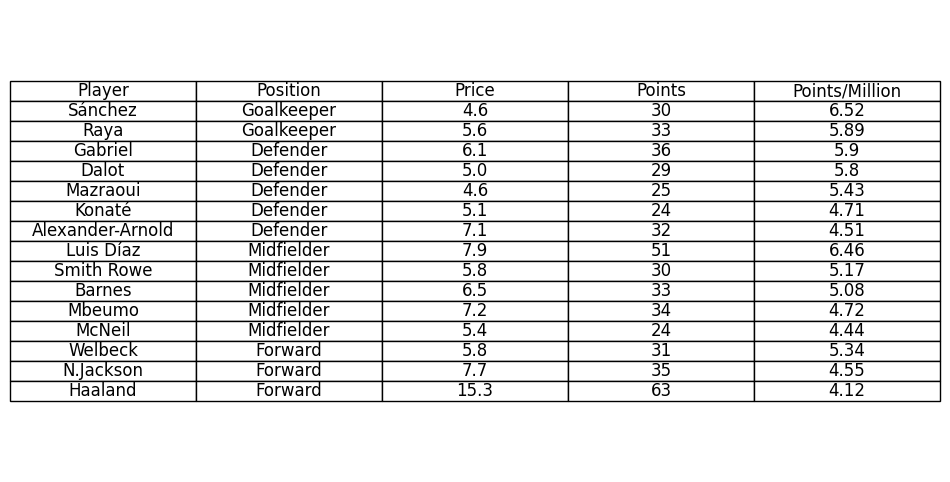

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the results of the selected players in a DataFrame called 'selected_players_df'
# This DataFrame should have columns 'NAME', 'POSITION', 'PRICE', 'POINTS', and 'POINTS_MILLION'

# Define the order of positions
position_order = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Sort the players within each position by 'POINTS_MILLION' and reset the index
sorted_players_df = selected_df.groupby('POSITION').apply(lambda x: x.sort_values(by='POINTS_MILLION', ascending=False)).reset_index(drop=True).round(2)

# Create the table using matplotlib's table function
table_data = []
for position in position_order:
    position_data = sorted_players_df[sorted_players_df['POSITION'] == position][['PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION']]
    table_data.extend(position_data.values.tolist())

table = ax.table(cellText=table_data,
                 colLabels=['Player', 'Position', 'Price', 'Points', 'Points/Million'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the table size

# Show the table
plt.show()


In [41]:
import pandas as pd

# Assuming you have a DataFrame 'selected_players_df' with columns 'NAME', 'POSITION', 'POINTS', and 'BENCH'
# 'BENCH' column indicates whether the player is on the bench (1) or not (0)

# Initialize a DataFrame to store the best players on the field and the bench
best_players_on_field = pd.DataFrame(columns=selected_df.columns)
best_players_on_bench = pd.DataFrame(columns=selected_df.columns)

# Define the maximum number of players to select for each position
max_players_by_position = {'Goalkeeper': 2, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}

# Iterate through each position and select the best players for the field and the rest for the bench
for position, max_players in max_players_by_position.items():
    position_players = selected_df[selected_df['POSITION'] == position]
    position_players = position_players.sort_values(by='POINTS', ascending=False)
    field_players = position_players.head(max_players - 1)
    bench_player = position_players.tail(1)
    best_players_on_field = best_players_on_field.append(field_players)
    best_players_on_bench = best_players_on_bench.append(bench_player)

# Print the best players on the field
print("Best Players on the Field:")
print(best_players_on_field)

# Print the players on the bench
print("\nPlayers on the Bench:")
print(best_players_on_bench)

AttributeError: 'DataFrame' object has no attribute 'append'

In [42]:
import pandas as pd

# Assuming 'selected_df' is the DataFrame containing the selected players
# with columns 'PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION'

# Initialize DataFrames to store the best players on the field and on the bench
best_players_on_field = pd.DataFrame(columns=selected_df.columns)
best_players_on_bench = pd.DataFrame(columns=selected_df.columns)

# Define the maximum number of players to select for each position
max_players_by_position = {'Goalkeeper': 2, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}

# Iterate through each position and select the best players for the field and the rest for the bench
for position, max_players in max_players_by_position.items():
    position_players = selected_df[selected_df['POSITION'] == position]
    position_players = position_players.sort_values(by='POINTS', ascending=False)
    field_players = position_players.head(max_players - 1)  # Best players for the field
    bench_player = position_players.tail(1)  # The remaining player goes to the bench

    # Concatenate the selected players to the respective DataFrames
    best_players_on_field = pd.concat([best_players_on_field, field_players])
    best_players_on_bench = pd.concat([best_players_on_bench, bench_player])

# Print the best players on the field
print("Best Players on the Field:")
print(best_players_on_field)

# Print the players on the bench
print("\nPlayers on the Bench:")
print(best_players_on_bench)


Best Players on the Field:
              PLAYER    POSITION  PRICE POINTS  POINTS_MILLION
9               Raya  Goalkeeper    5.6     33        5.892857
3            Gabriel    Defender    6.1     36        5.901639
11  Alexander-Arnold    Defender    7.1     32        4.507042
16             Dalot    Defender    5.0     29        5.800000
25          Mazraoui    Defender    4.6     25        5.434783
1          Luis Díaz  Midfielder    7.9     51        6.455696
7             Mbeumo  Midfielder    7.2     34        4.722222
8             Barnes  Midfielder    6.5     33        5.076923
14        Smith Rowe  Midfielder    5.8     30        5.172414
0            Haaland     Forward   15.3     63        4.117647
5          N.Jackson     Forward    7.7     35        4.545455

Players on the Bench:
     PLAYER    POSITION  PRICE POINTS  POINTS_MILLION
15  Sánchez  Goalkeeper    4.6     30        6.521739
28   Konaté    Defender    5.1     24        4.705882
29   McNeil  Midfielder    5.4  

<ipython-input-42-149a58e97b2a>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best_players_on_field = pd.concat([best_players_on_field, field_players])
<ipython-input-42-149a58e97b2a>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best_players_on_bench = pd.concat([best_players_on_bench, bench_player])


# 5. Plot optimal team

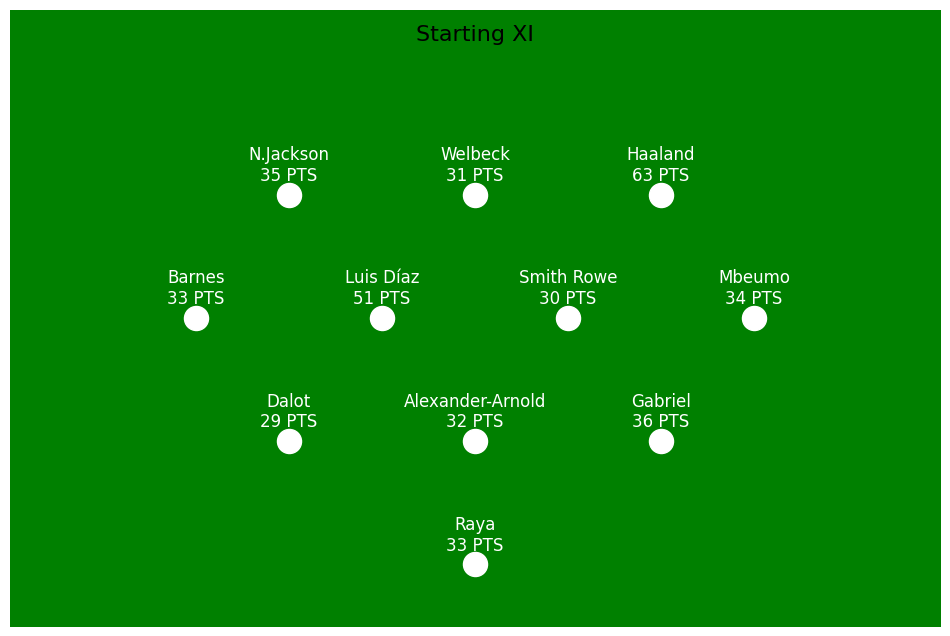

In [43]:
import matplotlib.pyplot as plt
import random

# Assuming you have the results of the selected players in a DataFrame called 'selected_df'
# This DataFrame should have columns 'NAME', 'TEAM', 'POSITION', 'PRICE', 'POINTS', and 'POINTS_MILLION'

# Sort the selected players DataFrame by POINTS in descending order
selected_df = selected_df.sort_values(by='POINTS', ascending=False)

# Create a larger football field
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Create a green football field background
ax.fill_between([0, 1], [0, 0], [1, 1], color='green')

# Add the "Starting XI" header at the top
ax.annotate("Starting XI", (0.5, 0.95), ha='center', fontsize=16, color='black')

# Define positions for plotting and their corresponding coordinates
position_coordinates = {
    'Goalkeeper': [(0.5, 0.1)],
    'Defender': [(0.3, 0.3), (0.5, 0.3), (0.7, 0.3)],
    'Midfielder': [(0.2, 0.5), (0.4, 0.5), (0.60, 0.5), (0.8, 0.5)],
    'Forward': [(0.3, 0.7), (0.5, 0.7), (0.7, 0.7)]
}

# Create a list to keep track of used player names for each position category
used_player_names = {position: [] for position in position_coordinates.keys()}

# Keep track of the number of players placed on the field
total_players_placed = 0

# Define the number of players to place for each position category
position_limits = {
    'Goalkeeper': 1,
    'Defender': 3,
    'Midfielder': 4,
    'Forward': 3
}

# Initialize counters for each position category
position_counts = {position: 0 for position in position_coordinates.keys()}

# Iterate through the players and plot them on the field
for _, player in selected_df.iterrows():
    name = player['PLAYER']
    points = player['POINTS']
    position = player['POSITION']

    # Check if the player name has already been used in the current position category
    if name in used_player_names[position]:
        continue

    # Check if the maximum limit for the position category has been reached
    if position_counts[position] >= position_limits[position]:
        continue

    # Get the next available position for the current position category
    positions = position_coordinates.get(position, [])

    if not positions:
        continue

    # Randomly shuffle the positions within the category
    random.shuffle(positions)

    x, y = positions.pop()

    # Display the player name and points at their position
    ax.annotate(f"{name}\n{points} PTS", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='white')

    # Plot players as white dots
    ax.scatter(x, y, color='white', s=300)

    # Mark the player name as used in the current position category
    used_player_names[position].append(name)

    # Increment the total number of players placed
    total_players_placed += 1

    # Increment the position category count
    position_counts[position] += 1

    # Break the loop if 11 players have been placed on the field
    if total_players_placed >= 11:
        break

# Show the football field with players
plt.show()


# 6. Points vs cost regression

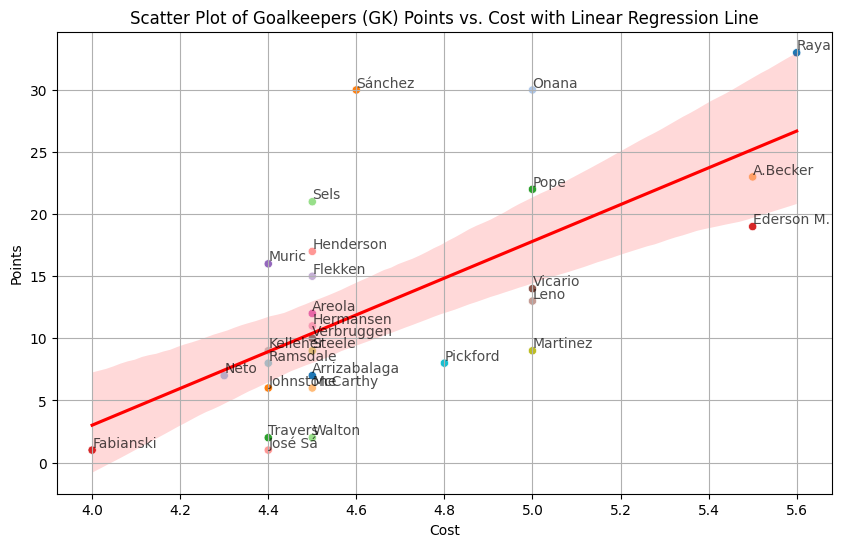

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Goalkeepers (GK)
gk_df = df[df['POSITION'] == 'Goalkeeper']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=gk_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=gk_df, scatter=False, color='red')

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Goalkeepers (GK) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in gk_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


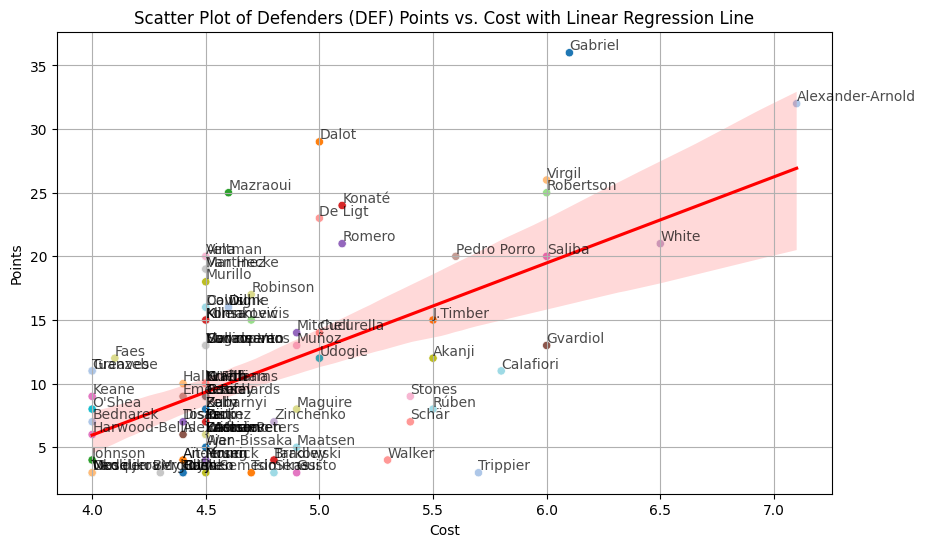

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Defenders (DEF)
def_df = df[df['POSITION'] == 'Defender']


filtered_df = def_df[def_df['POINTS'] > 2]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=filtered_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=filtered_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
#plt.xlim(filtered_df['PRICE'].min() - 1, filtered_df['PRICE'].max() + 1)
#plt.ylim(filtered_df['POINTS'].min() - 1, filtered_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Defenders (DEF) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in filtered_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


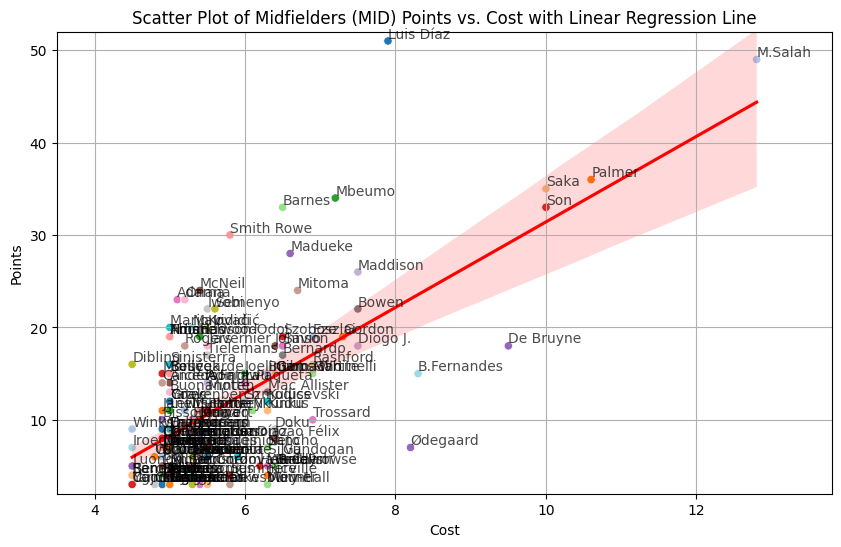

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Midfielders (MID)
mid_df = df[df['POSITION'] == 'Midfielder']


mid_df = mid_df[mid_df['POINTS'] > 2]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=mid_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=mid_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(mid_df['PRICE'].min() - 1, mid_df['PRICE'].max() + 1)
plt.ylim(mid_df['POINTS'].min() - 1, mid_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Midfielders (MID) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in mid_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()

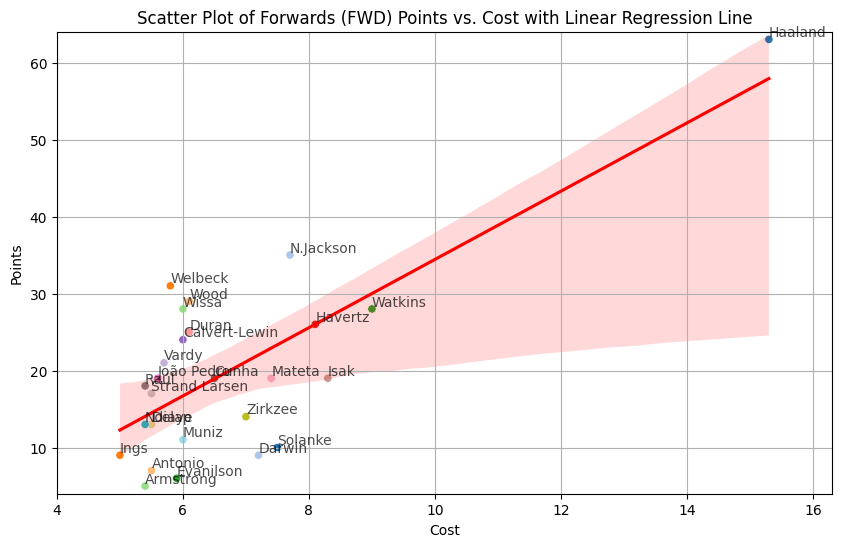

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Forwards (FWD)
fwd_df = df[df['POSITION'] == 'Forward']

fwd_df = fwd_df[fwd_df['POINTS'] > 4]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=fwd_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=fwd_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(fwd_df['PRICE'].min() - 1, fwd_df['PRICE'].max() + 1)
plt.ylim(fwd_df['POINTS'].min() - 1, fwd_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Forwards (FWD) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in fwd_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


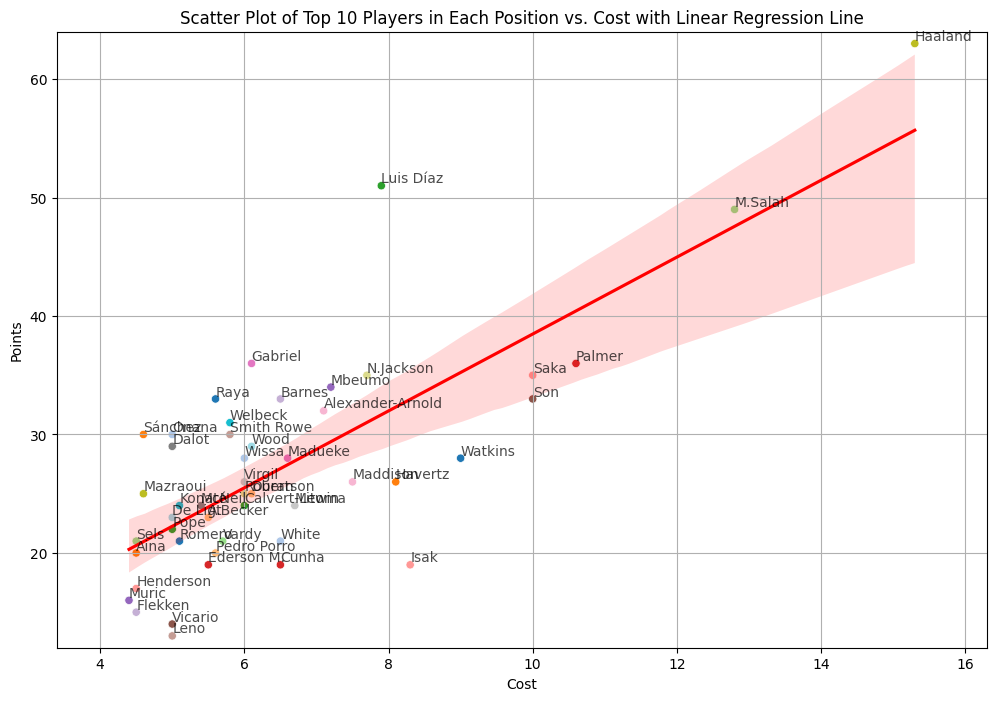

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Create an empty list to store the dataframes for each position
position_dfs = []

# Iterate through each position category
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
for position in positions:
    # Filter the DataFrame to select the top 10 players for each position by points
    position_df = df[df['POSITION'] == position].nlargest(12, 'POINTS')
    position_dfs.append(position_df)

# Concatenate the dataframes for all positions
combined_df = pd.concat(position_dfs)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PRICE', y='POINTS', data=combined_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line for the combined data
sns.regplot(x='PRICE', y='POINTS', data=combined_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(combined_df['PRICE'].min() - 1, combined_df['PRICE'].max() + 1)
plt.ylim(combined_df['POINTS'].min() - 1, combined_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Top 10 Players in Each Position vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in combined_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
df = df.reset_index(drop=True)


In [ ]:
import pandas as pd

# Example player data
player_df = pd.DataFrame({'Player': ['Player1', 'Player2'],
                          'Team': ['TeamA', 'TeamB'],
                          'Points': [100, 150]})

# Example FDR data
fdr_df = pd.DataFrame({'Team': ['TeamA', 'TeamB'],
                       'FDR': [3, 2]})  # Lower FDR indicates an easier fixture

# Merge the DataFrames on the 'Team' column
merged_df = pd.merge(player_df, fdr_df, on='Team')

# Now, merged_df contains player data along with their team's FDR
print(merged_df)


    Player   Team  Points  FDR
0  Player1  TeamA     100    3
1  Player2  TeamB     150    2


In [ ]:
import pandas as pd

# Example player data
player_df = pd.DataFrame({'Player': ['Player1', 'Player2'],
                          'Team': ['TeamA', 'TeamB'],
                          'Points': [100, 150],
                          'Is_Home': [1, 0]})  # 1 for home game, 0 for away game

# Now, player_df contains information about whether each game is home or away
print(player_df)


    Player   Team  Points  Is_Home
0  Player1  TeamA     100        1
1  Player2  TeamB     150        0


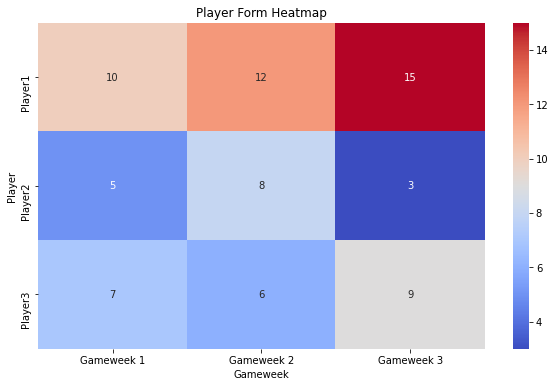

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'Player': ['Player1', 'Player2', 'Player3'],
    'Gameweek 1': [10, 5, 7],
    'Gameweek 2': [12, 8, 6],
    'Gameweek 3': [15, 3, 9],
    # Add as many gameweeks as you have data for
}
df = pd.DataFrame(data)
df = df.set_index('Player')

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm')

# Adding titles and labels
plt.title('Player Form Heatmap')
plt.xlabel('Gameweek')
plt.ylabel('Player')

# Display the heatmap
plt.show()


In [ ]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Define the set of players
players = range(len(df))

# Define a binary decision variable for each player (1 if selected, 0 if not)
model.Selected = Var(players, within=Binary)

# Define the objective function to maximize total points
model.obj = Objective(expr=sum(model.Selected[i] * df.at[i, 'POINTS'] for i in players), sense=maximize)

# Define the budget constraint for total budget
total_budget = 103  # Total budget constraint in million
model.total_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.at[i, 'PRICE'] for i in players) <= total_budget)

# Define the position constraints
position_constraints = {'GK': 2, 'DEF': 5, 'MID': 5, 'FWD': 3}

for position, num_players in position_constraints.items():
    model.add_component(
        f"{position}_constraint",
        Constraint(
            expr=sum(model.Selected[i] for i in players if df.at[i, 'POSITION'] == position) == num_players
        )
    )

# Define the bench budget constraint
bench_budget_constraint = 17  # Minimum budget constraint for bench players in million
model.bench_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.at[i, 'PRICE'] for i in players) >= bench_budget_constraint)

# Solve the optimization problem
solver = SolverFactory('glpk')
results = solver.solve(model)

# Extract the selected players
selected_players = [i for i in players if model.Selected[i] == 1]

# Print the selected players
print("Selected Players:")
for i in selected_players:
    print(df.at[i, 'PLAYER'], df.at[i, 'TEAM'], df.at[i, 'POSITION'], df.at[i, 'POINTS'])

# Print the total points and total cost of the selected team
total_points = sum(df.at[i, 'POINTS'] for i in selected_players)
total_cost = sum(df.at[i, 'PRICE'] for i in selected_players)
print(f"\nTotal Points: {total_points}")
print(f"Total Cost: £{total_cost} M")


ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [ ]:
print(df.columns)

Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION',
       'POINTS_MATCH'],
      dtype='object')


In [ ]:

import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({'player_name': ['Alice', 'Bob', 'Charlie'],
                    'score': [85, 78, 96]})

df2 = pd.DataFrame({'player_name': ['Alice', 'Bob', 'David'],
                    'team': ['Team A', 'Team B', 'Team C']})

# Left merging on 'player_name'
result = pd.merge(df1, df2, on='player_name', how='left')

print(result)


  player_name  score    team
0       Alice     85  Team A
1         Bob     78  Team B
2     Charlie     96     NaN
